In [1]:
# to access functions from other locations
import sys
sys.path.append('/data/ad181/RemoteDir/rl_robust_owc')

In [2]:
%matplotlib notebook
import numpy as np
import time
import pickle
import os
import matplotlib.pyplot as plt

import gym
from stable_baselines3.ppo import PPO, MlpPolicy
from stable_baselines3.common.vec_env import SubprocVecEnv, DummyVecEnv
from stable_baselines3.common.callbacks import CallbackList
from utils.custom_eval_callback import CustomEvalCallback
from typing import Callable

from utils.plot_functions import plot_learning
from utils.env_wrappers import StepReset, StateCoarse

/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/co

In [3]:
seed=1
case='case_2_ppo_frozen'

In [4]:
os.makedirs('./data', exist_ok=True)
os.makedirs('./data/'+case, exist_ok=True)

In [5]:
with open('../envs_params/env_data/env_train.pkl', 'rb') as input:
    env_train = pickle.load(input)
k_list_train = env_train.k_list[4]
env_train.set_k(np.array([k_list_train]))

with open('../envs_params/env_data/env_eval.pkl', 'rb') as input:
    env_eval = pickle.load(input)

In [6]:
# env wrapper to reduce state space
x_coords, y_coords = env_train.p_x, env_train.p_y

def env_wrappers(env, x_coords, y_coords):
    env = StepReset(env)
    env = StateCoarse(env, x_coords, y_coords, include_well_pr=True)
    return env

In [7]:
# env_train = env_wrappers(env_train, x_coords, y_coords)
# print(env_train.observation_space)
# base_action = np.ones(env_train.action_space.shape[0])

# state, done = env_train.reset(), False
# print(state)
# while not done:
#     state, reward, done, info = env_train.step(base_action)
#     print(state)

In [8]:
def make_env(env, rank: int, seed: int) -> Callable:
    """
    Utility function for multiprocessed env.
    
    :param env_id: (str) the environment ID
    :param num_env: (int) the number of environment you wish to have in subprocesses
    :param seed: (int) the inital seed for RNG
    :param rank: (int) index of the subprocess
    :return: (Callable)
    """
    def _init() -> gym.Env:
        env_ = env
        env_.seed(seed + rank)
        return env_
    return _init

seed 1
Box(-100000.0, 100000.0, (9,), float64)
seed 1: model definition ..
Using cuda device
seed 1: learning ..


/data/ad181/RemoteDir/Paper_1_codes_revised/utils/custom_eval_callback.py:97: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7fae0da5f1d0> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7fae0da5f160>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")
/data/ad181/RemoteDir/Paper_1_codes_revised/utils/custom_eval_callback.py:97: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7fae0da5f1d0> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7fae0da5f198>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")


-----------------------------
| time/              |      |
|    fps             | 242  |
|    iterations      | 1    |
|    time_elapsed    | 13   |
|    total_timesteps | 3200 |
-----------------------------
Eval num_timesteps=6400, episode_reward=0.59 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=6400, episode_reward=0.54 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 4          |
|    mean_reward          | 0.54       |
| time/                   |            |
|    fps                  | 118        |
|    iterations           | 2          |
|    time_elapsed         | 53         |
|    total_timesteps      | 6400       |
| train/                  |            |
|    approx_kl            | 0.00267396 |
|    clip_fraction        | 0.0988     |
|    clip_range           | 0.1        |
|    entropy_loss         | 2.41       |
|   

------------------------------------------
| time/                   |              |
|    fps                  | 86           |
|    iterations           | 11           |
|    time_elapsed         | 406          |
|    total_timesteps      | 35200        |
| train/                  |              |
|    approx_kl            | 0.0024109734 |
|    clip_fraction        | 0.215        |
|    clip_range           | 0.1          |
|    entropy_loss         | 2.58         |
|    explained_variance   | 0.974        |
|    learning_rate        | 5e-05        |
|    loss                 | 0.0244       |
|    n_updates            | 200          |
|    policy_gradient_loss | -0.0124      |
|    std                  | 0.144        |
|    value_loss           | 0.000808     |
------------------------------------------
Eval num_timesteps=38400, episode_reward=0.59 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=38400, episode_reward=0.58 +/- 0.00
Episode length: 4.00 

Eval num_timesteps=64000, episode_reward=0.60 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=64000, episode_reward=0.59 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 4            |
|    mean_reward          | 0.587        |
| time/                   |              |
|    fps                  | 86           |
|    iterations           | 20           |
|    time_elapsed         | 740          |
|    total_timesteps      | 64000        |
| train/                  |              |
|    approx_kl            | 0.0028720677 |
|    clip_fraction        | 0.176        |
|    clip_range           | 0.1          |
|    entropy_loss         | 2.87         |
|    explained_variance   | 0.981        |
|    learning_rate        | 5e-05        |
|    loss                 | -0.0206      |
|    n_updates            | 380          |
|    policy_gradient_loss | -0.009

------------------------------------------
| time/                   |              |
|    fps                  | 85           |
|    iterations           | 29           |
|    time_elapsed         | 1091         |
|    total_timesteps      | 92800        |
| train/                  |              |
|    approx_kl            | 0.0022173785 |
|    clip_fraction        | 0.154        |
|    clip_range           | 0.1          |
|    entropy_loss         | 3.23         |
|    explained_variance   | 0.986        |
|    learning_rate        | 5e-05        |
|    loss                 | -0.00957     |
|    n_updates            | 560          |
|    policy_gradient_loss | -0.00658     |
|    std                  | 0.127        |
|    value_loss           | 0.000473     |
------------------------------------------
Eval num_timesteps=96000, episode_reward=0.60 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=96000, episode_reward=0.59 +/- 0.00
Episode length: 4.00 +/- 0.00
-------------

Eval num_timesteps=121600, episode_reward=0.60 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=121600, episode_reward=0.59 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 4            |
|    mean_reward          | 0.594        |
| time/                   |              |
|    fps                  | 84           |
|    iterations           | 38           |
|    time_elapsed         | 1432         |
|    total_timesteps      | 121600       |
| train/                  |              |
|    approx_kl            | 0.0009487516 |
|    clip_fraction        | 0.18         |
|    clip_range           | 0.1          |
|    entropy_loss         | 3.7          |
|    explained_variance   | 0.99         |
|    learning_rate        | 5e-05        |
|    loss                 | 0.00552      |
|    n_updates            | 740          |
|    policy_gradient_loss | -0.0

-----------------------------------------
| time/                   |             |
|    fps                  | 84          |
|    iterations           | 47          |
|    time_elapsed         | 1780        |
|    total_timesteps      | 150400      |
| train/                  |             |
|    approx_kl            | 0.002466262 |
|    clip_fraction        | 0.149       |
|    clip_range           | 0.1         |
|    entropy_loss         | 4.08        |
|    explained_variance   | 0.992       |
|    learning_rate        | 5e-05       |
|    loss                 | 0.0305      |
|    n_updates            | 920         |
|    policy_gradient_loss | -0.00597    |
|    std                  | 0.108       |
|    value_loss           | 0.000275    |
-----------------------------------------
Eval num_timesteps=153600, episode_reward=0.60 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=153600, episode_reward=0.59 +/- 0.00
Episode length: 4.00 +/- 0.00
------------------------------

Eval num_timesteps=179200, episode_reward=0.60 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=179200, episode_reward=0.60 +/- 0.00
Episode length: 4.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 4           |
|    mean_reward          | 0.595       |
| time/                   |             |
|    fps                  | 84          |
|    iterations           | 56          |
|    time_elapsed         | 2119        |
|    total_timesteps      | 179200      |
| train/                  |             |
|    approx_kl            | 0.001720041 |
|    clip_fraction        | 0.156       |
|    clip_range           | 0.1         |
|    entropy_loss         | 4.52        |
|    explained_variance   | 0.994       |
|    learning_rate        | 5e-05       |
|    loss                 | 0.0111      |
|    n_updates            | 1100        |
|    policy_gradient_loss | -0.00536    |
|    std

------------------------------------------
| time/                   |              |
|    fps                  | 84           |
|    iterations           | 65           |
|    time_elapsed         | 2463         |
|    total_timesteps      | 208000       |
| train/                  |              |
|    approx_kl            | 0.0046326006 |
|    clip_fraction        | 0.15         |
|    clip_range           | 0.1          |
|    entropy_loss         | 4.92         |
|    explained_variance   | 0.995        |
|    learning_rate        | 5e-05        |
|    loss                 | -0.00205     |
|    n_updates            | 1280         |
|    policy_gradient_loss | -0.00352     |
|    std                  | 0.0924       |
|    value_loss           | 0.000164     |
------------------------------------------
Eval num_timesteps=211200, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=211200, episode_reward=0.60 +/- 0.00
Episode length: 4.0

Eval num_timesteps=236800, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=236800, episode_reward=0.60 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 4            |
|    mean_reward          | 0.598        |
| time/                   |              |
|    fps                  | 84           |
|    iterations           | 74           |
|    time_elapsed         | 2796         |
|    total_timesteps      | 236800       |
| train/                  |              |
|    approx_kl            | 0.0031757532 |
|    clip_fraction        | 0.156        |
|    clip_range           | 0.1          |
|    entropy_loss         | 5.35         |
|    explained_variance   | 0.997        |
|    learning_rate        | 5e-05        |
|    loss                 | -0.0103      |
|    n_updates            | 1460         |
|    polic

------------------------------------------
| time/                   |              |
|    fps                  | 84           |
|    iterations           | 83           |
|    time_elapsed         | 3138         |
|    total_timesteps      | 265600       |
| train/                  |              |
|    approx_kl            | 0.0025631308 |
|    clip_fraction        | 0.16         |
|    clip_range           | 0.1          |
|    entropy_loss         | 5.81         |
|    explained_variance   | 0.998        |
|    learning_rate        | 5e-05        |
|    loss                 | 0.0134       |
|    n_updates            | 1640         |
|    policy_gradient_loss | -0.00378     |
|    std                  | 0.0784       |
|    value_loss           | 8.53e-05     |
------------------------------------------
Eval num_timesteps=268800, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=268800, episode_reward=0.60 +/- 0.00
Episode length: 4.0

Eval num_timesteps=294400, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=294400, episode_reward=0.60 +/- 0.00
Episode length: 4.00 +/- 0.00
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 4            |
|    mean_reward          | 0.6          |
| time/                   |              |
|    fps                  | 84           |
|    iterations           | 92           |
|    time_elapsed         | 3473         |
|    total_timesteps      | 294400       |
| train/                  |              |
|    approx_kl            | 0.0044774963 |
|    clip_fraction        | 0.17         |
|    clip_range           | 0.1          |
|    entropy_loss         | 6.19         |
|    explained_variance   | 0.998        |
|    learning_rate        | 5e-05        |
|    loss                 | 0.00104      |
|    n_updates            | 1820         |
|    policy_gradient_loss | -0.00333     |
|    std   

<IPython.core.display.Javascript object>


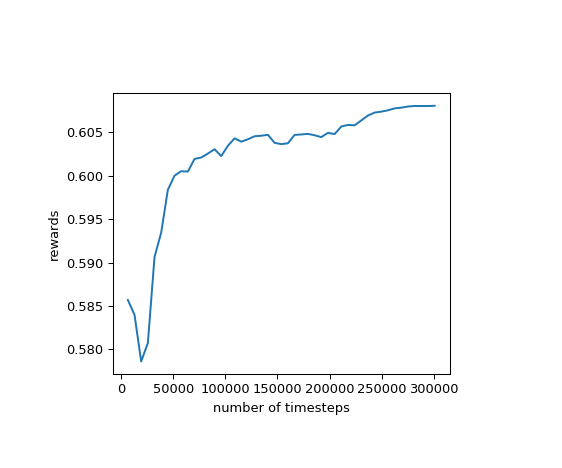

<IPython.core.display.Javascript object>


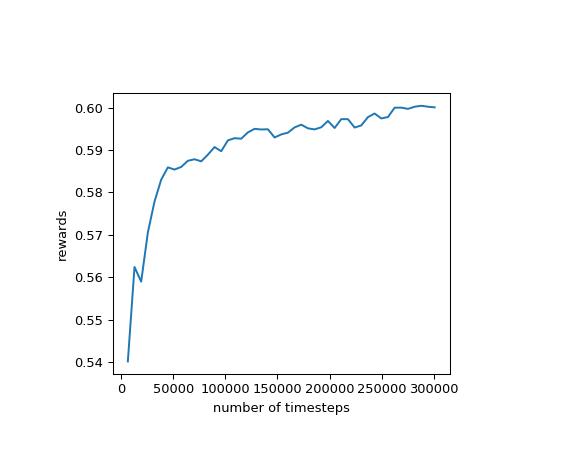

seed 2
Box(-100000.0, 100000.0, (9,), float64)
seed 2: model definition ..
Using cuda device
seed 2: learning ..


/data/ad181/RemoteDir/Paper_1_codes_revised/utils/custom_eval_callback.py:97: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7fae00658a58> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7fae08040940>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")
/data/ad181/RemoteDir/Paper_1_codes_revised/utils/custom_eval_callback.py:97: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7fae00658a58> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7fae006800b8>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")


----------------------------------------
| time/                   |            |
|    fps                  | 239        |
|    iterations           | 1          |
|    time_elapsed         | 13         |
|    total_timesteps      | 3200       |
| train/                  |            |
|    approx_kl            | 0.00389408 |
|    clip_fraction        | 0.166      |
|    clip_range           | 0.1        |
|    entropy_loss         | 6.29       |
|    explained_variance   | 0.998      |
|    learning_rate        | 5e-05      |
|    loss                 | 0.0234     |
|    n_updates            | 1880       |
|    policy_gradient_loss | -0.00271   |
|    std                  | 0.0726     |
|    value_loss           | 5.85e-05   |
----------------------------------------
Eval num_timesteps=6400, episode_reward=0.57 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=6400, episode_reward=0.57 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
---------

Eval num_timesteps=32000, episode_reward=0.58 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=32000, episode_reward=0.57 +/- 0.00
Episode length: 4.00 +/- 0.00
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 4            |
|    mean_reward          | 0.57         |
| time/                   |              |
|    fps                  | 92           |
|    iterations           | 10           |
|    time_elapsed         | 346          |
|    total_timesteps      | 32000        |
| train/                  |              |
|    approx_kl            | 0.0053031673 |
|    clip_fraction        | 0.189        |
|    clip_range           | 0.1          |
|    entropy_loss         | 2.56         |
|    explained_variance   | 0.973        |
|    learning_rate        | 5e-05        |
|    loss                 | -0.0261      |
|    n_updates            | 180          |
|    policy_gradient_loss | -0.0109      |
|    std     

------------------------------------------
| time/                   |              |
|    fps                  | 89           |
|    iterations           | 19           |
|    time_elapsed         | 681          |
|    total_timesteps      | 60800        |
| train/                  |              |
|    approx_kl            | 0.0021323424 |
|    clip_fraction        | 0.182        |
|    clip_range           | 0.1          |
|    entropy_loss         | 2.85         |
|    explained_variance   | 0.981        |
|    learning_rate        | 5e-05        |
|    loss                 | 0.0173       |
|    n_updates            | 360          |
|    policy_gradient_loss | -0.00923     |
|    std                  | 0.136        |
|    value_loss           | 0.000633     |
------------------------------------------
Eval num_timesteps=64000, episode_reward=0.60 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=64000, episode_reward=0.58 +/- 0.00
Episode length: 4.00 

Eval num_timesteps=89600, episode_reward=0.60 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=89600, episode_reward=0.58 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 4           |
|    mean_reward          | 0.584       |
| time/                   |             |
|    fps                  | 87          |
|    iterations           | 28          |
|    time_elapsed         | 1027        |
|    total_timesteps      | 89600       |
| train/                  |             |
|    approx_kl            | 0.003966106 |
|    clip_fraction        | 0.15        |
|    clip_range           | 0.1         |
|    entropy_loss         | 3.24        |
|    explained_variance   | 0.985       |
|    learning_rate        | 5e-05       |
|    loss                 | -0.0304     |
|    n_updates            | 540         |
|    policy_gradient_loss | -0.00629    |
|    std  

-----------------------------------------
| time/                   |             |
|    fps                  | 86          |
|    iterations           | 37          |
|    time_elapsed         | 1363        |
|    total_timesteps      | 118400      |
| train/                  |             |
|    approx_kl            | 0.004622726 |
|    clip_fraction        | 0.146       |
|    clip_range           | 0.1         |
|    entropy_loss         | 3.58        |
|    explained_variance   | 0.99        |
|    learning_rate        | 5e-05       |
|    loss                 | -0.0125     |
|    n_updates            | 720         |
|    policy_gradient_loss | -0.00572    |
|    std                  | 0.119       |
|    value_loss           | 0.00036     |
-----------------------------------------
Eval num_timesteps=121600, episode_reward=0.60 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=121600, episode_reward=0.59 +/- 0.00
Episode length: 4.00 +/- 0.00
New best

Eval num_timesteps=147200, episode_reward=0.60 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=147200, episode_reward=0.59 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 4            |
|    mean_reward          | 0.59         |
| time/                   |              |
|    fps                  | 86           |
|    iterations           | 46           |
|    time_elapsed         | 1706         |
|    total_timesteps      | 147200       |
| train/                  |              |
|    approx_kl            | 0.0048064333 |
|    clip_fraction        | 0.153        |
|    clip_range           | 0.1          |
|    entropy_loss         | 3.93         |
|    explained_variance   | 0.992        |
|    learning_rate        | 5e-05        |
|    loss                 | -0.0158      |
|    n_updates            | 900          |
|    polic

-----------------------------------------
| time/                   |             |
|    fps                  | 86          |
|    iterations           | 55          |
|    time_elapsed         | 2036        |
|    total_timesteps      | 176000      |
| train/                  |             |
|    approx_kl            | 0.004174467 |
|    clip_fraction        | 0.153       |
|    clip_range           | 0.1         |
|    entropy_loss         | 4.27        |
|    explained_variance   | 0.993       |
|    learning_rate        | 5e-05       |
|    loss                 | -0.0237     |
|    n_updates            | 1080        |
|    policy_gradient_loss | -0.00484    |
|    std                  | 0.104       |
|    value_loss           | 0.000231    |
-----------------------------------------
Eval num_timesteps=179200, episode_reward=0.60 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=179200, episode_reward=0.59 +/- 0.00
Episode length: 4.00 +/- 0.00
New best

Eval num_timesteps=204800, episode_reward=0.60 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=204800, episode_reward=0.59 +/- 0.00
Episode length: 4.00 +/- 0.00
-------------------------------------------
| eval/                   |               |
|    mean_ep_length       | 4             |
|    mean_reward          | 0.591         |
| time/                   |               |
|    fps                  | 86            |
|    iterations           | 64            |
|    time_elapsed         | 2368          |
|    total_timesteps      | 204800        |
| train/                  |               |
|    approx_kl            | 0.00022542584 |
|    clip_fraction        | 0.156         |
|    clip_range           | 0.1           |
|    entropy_loss         | 4.64          |
|    explained_variance   | 0.995         |
|    learning_rate        | 5e-05         |
|    loss                 | 0.0245        |
|    n_updates            | 1260          |
|    policy_gr

-------------------------------------------
| time/                   |               |
|    fps                  | 86            |
|    iterations           | 73            |
|    time_elapsed         | 2697          |
|    total_timesteps      | 233600        |
| train/                  |               |
|    approx_kl            | 0.00071435736 |
|    clip_fraction        | 0.151         |
|    clip_range           | 0.1           |
|    entropy_loss         | 4.96          |
|    explained_variance   | 0.996         |
|    learning_rate        | 5e-05         |
|    loss                 | -0.00984      |
|    n_updates            | 1440          |
|    policy_gradient_loss | -0.00493      |
|    std                  | 0.0923        |
|    value_loss           | 0.000155      |
-------------------------------------------
Eval num_timesteps=236800, episode_reward=0.60 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=236800, episode_reward=0.59 +/- 0.00


Eval num_timesteps=262400, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=262400, episode_reward=0.60 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 4            |
|    mean_reward          | 0.596        |
| time/                   |              |
|    fps                  | 85           |
|    iterations           | 82           |
|    time_elapsed         | 3051         |
|    total_timesteps      | 262400       |
| train/                  |              |
|    approx_kl            | 0.0019100079 |
|    clip_fraction        | 0.154        |
|    clip_range           | 0.1          |
|    entropy_loss         | 5.35         |
|    explained_variance   | 0.997        |
|    learning_rate        | 5e-05        |
|    loss                 | -0.0244      |
|    n_updates            | 1620         |
|    policy_gradient_loss | -0.0

------------------------------------------
| time/                   |              |
|    fps                  | 85           |
|    iterations           | 91           |
|    time_elapsed         | 3394         |
|    total_timesteps      | 291200       |
| train/                  |              |
|    approx_kl            | 0.0012543341 |
|    clip_fraction        | 0.149        |
|    clip_range           | 0.1          |
|    entropy_loss         | 5.71         |
|    explained_variance   | 0.998        |
|    learning_rate        | 5e-05        |
|    loss                 | 0.0127       |
|    n_updates            | 1800         |
|    policy_gradient_loss | -0.00268     |
|    std                  | 0.0803       |
|    value_loss           | 8.49e-05     |
------------------------------------------
Eval num_timesteps=294400, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=294400, episode_reward=0.60 +/- 0.00
Episode length: 4.0

<IPython.core.display.Javascript object>


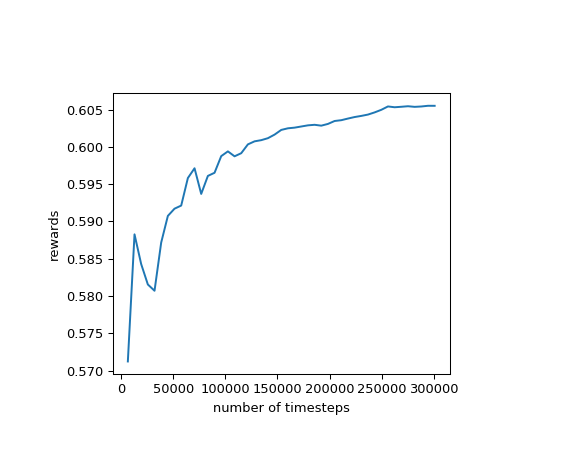

<IPython.core.display.Javascript object>


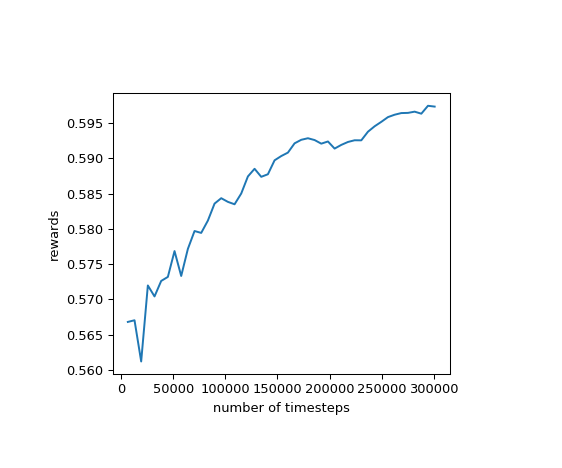

seed 3
Box(-100000.0, 100000.0, (9,), float64)
seed 3: model definition ..
Using cuda device
seed 3: learning ..


/data/ad181/RemoteDir/Paper_1_codes_revised/utils/custom_eval_callback.py:97: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7fae004c2550> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7fae004cf0f0>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")
/data/ad181/RemoteDir/Paper_1_codes_revised/utils/custom_eval_callback.py:97: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7fae004c2550> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7fae004cfe10>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")


-----------------------------------------
| time/                   |             |
|    fps                  | 239         |
|    iterations           | 1           |
|    time_elapsed         | 13          |
|    total_timesteps      | 3200        |
| train/                  |             |
|    approx_kl            | 0.004291204 |
|    clip_fraction        | 0.143       |
|    clip_range           | 0.1         |
|    entropy_loss         | 5.85        |
|    explained_variance   | 0.998       |
|    learning_rate        | 5e-05       |
|    loss                 | -0.00305    |
|    n_updates            | 1880        |
|    policy_gradient_loss | -0.00251    |
|    std                  | 0.0784      |
|    value_loss           | 8.14e-05    |
-----------------------------------------
Eval num_timesteps=6400, episode_reward=0.57 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=6400, episode_reward=0.59 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mea

Eval num_timesteps=32000, episode_reward=0.59 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=32000, episode_reward=0.57 +/- 0.00
Episode length: 4.00 +/- 0.00
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 4            |
|    mean_reward          | 0.568        |
| time/                   |              |
|    fps                  | 91           |
|    iterations           | 10           |
|    time_elapsed         | 349          |
|    total_timesteps      | 32000        |
| train/                  |              |
|    approx_kl            | 0.0031387603 |
|    clip_fraction        | 0.21         |
|    clip_range           | 0.1          |
|    entropy_loss         | 2.51         |
|    explained_variance   | 0.969        |
|    learning_rate        | 5e-05        |
|    loss                 | 0.000857     |
|    n_updates            | 180          |
|    policy_gradient_loss | -0.0125      |
|    std     

------------------------------------------
| time/                   |              |
|    fps                  | 89           |
|    iterations           | 19           |
|    time_elapsed         | 675          |
|    total_timesteps      | 60800        |
| train/                  |              |
|    approx_kl            | 0.0022666105 |
|    clip_fraction        | 0.176        |
|    clip_range           | 0.1          |
|    entropy_loss         | 2.84         |
|    explained_variance   | 0.979        |
|    learning_rate        | 5e-05        |
|    loss                 | 0.0273       |
|    n_updates            | 360          |
|    policy_gradient_loss | -0.00868     |
|    std                  | 0.137        |
|    value_loss           | 0.000673     |
------------------------------------------
Eval num_timesteps=64000, episode_reward=0.60 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=64000, episode_reward=0.58 +/- 0.00
Episode length: 4.00 

Eval num_timesteps=89600, episode_reward=0.60 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=89600, episode_reward=0.59 +/- 0.00
Episode length: 4.00 +/- 0.00
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 4            |
|    mean_reward          | 0.586        |
| time/                   |              |
|    fps                  | 87           |
|    iterations           | 28           |
|    time_elapsed         | 1022         |
|    total_timesteps      | 89600        |
| train/                  |              |
|    approx_kl            | 0.0048539056 |
|    clip_fraction        | 0.17         |
|    clip_range           | 0.1          |
|    entropy_loss         | 3.23         |
|    explained_variance   | 0.985        |
|    learning_rate        | 5e-05        |
|    loss                 | 0.0052       |
|    n_updates            | 540          |
|    policy_gradient_loss | -0.007

------------------------------------------
| time/                   |              |
|    fps                  | 87           |
|    iterations           | 37           |
|    time_elapsed         | 1352         |
|    total_timesteps      | 118400       |
| train/                  |              |
|    approx_kl            | 0.0023789767 |
|    clip_fraction        | 0.174        |
|    clip_range           | 0.1          |
|    entropy_loss         | 3.62         |
|    explained_variance   | 0.99         |
|    learning_rate        | 5e-05        |
|    loss                 | 0.0182       |
|    n_updates            | 720          |
|    policy_gradient_loss | -0.00659     |
|    std                  | 0.118        |
|    value_loss           | 0.000335     |
------------------------------------------
Eval num_timesteps=121600, episode_reward=0.60 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=121600, episode_reward=0.59 +/- 0.00
Episode length: 4.0

Eval num_timesteps=147200, episode_reward=0.60 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=147200, episode_reward=0.60 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 4           |
|    mean_reward          | 0.597       |
| time/                   |             |
|    fps                  | 86          |
|    iterations           | 46          |
|    time_elapsed         | 1693        |
|    total_timesteps      | 147200      |
| train/                  |             |
|    approx_kl            | 0.002795093 |
|    clip_fraction        | 0.16        |
|    clip_range           | 0.1         |
|    entropy_loss         | 4.13        |
|    explained_variance   | 0.992       |
|    learning_rate        | 5e-05       |
|    loss                 | -0.00488    |
|    n_updates            | 900         |
|    policy_gradient_loss | -0.00638    |
|    std

------------------------------------------
| time/                   |              |
|    fps                  | 86           |
|    iterations           | 55           |
|    time_elapsed         | 2023         |
|    total_timesteps      | 176000       |
| train/                  |              |
|    approx_kl            | 0.0030967211 |
|    clip_fraction        | 0.135        |
|    clip_range           | 0.1          |
|    entropy_loss         | 4.6          |
|    explained_variance   | 0.995        |
|    learning_rate        | 5e-05        |
|    loss                 | -0.00847     |
|    n_updates            | 1080         |
|    policy_gradient_loss | -0.00408     |
|    std                  | 0.0983       |
|    value_loss           | 0.000156     |
------------------------------------------
Eval num_timesteps=179200, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=179200, episode_reward=0.60 +/- 0.00
Episode length: 4.0

Eval num_timesteps=204800, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=204800, episode_reward=0.60 +/- 0.00
Episode length: 4.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 4           |
|    mean_reward          | 0.601       |
| time/                   |             |
|    fps                  | 86          |
|    iterations           | 64          |
|    time_elapsed         | 2365        |
|    total_timesteps      | 204800      |
| train/                  |             |
|    approx_kl            | 0.005479992 |
|    clip_fraction        | 0.159       |
|    clip_range           | 0.1         |
|    entropy_loss         | 5.01        |
|    explained_variance   | 0.997       |
|    learning_rate        | 5e-05       |
|    loss                 | 0.0192      |
|    n_updates            | 1260        |
|    policy_gradient_loss | -0.00557    |
|    std                  | 0.

------------------------------------------
| time/                   |              |
|    fps                  | 86           |
|    iterations           | 73           |
|    time_elapsed         | 2689         |
|    total_timesteps      | 233600       |
| train/                  |              |
|    approx_kl            | 0.0047815978 |
|    clip_fraction        | 0.173        |
|    clip_range           | 0.1          |
|    entropy_loss         | 5.45         |
|    explained_variance   | 0.998        |
|    learning_rate        | 5e-05        |
|    loss                 | -0.00485     |
|    n_updates            | 1440         |
|    policy_gradient_loss | -0.00454     |
|    std                  | 0.0847       |
|    value_loss           | 8.05e-05     |
------------------------------------------
Eval num_timesteps=236800, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=236800, episode_reward=0.60 +/- 0.00
Episode length: 4.00 +/- 0.00
-----------

Eval num_timesteps=262400, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
New best mean reward!
Eval num_timesteps=262400, episode_reward=0.60 +/- 0.00
Episode length: 4.00 +/- 0.00
------------------------------------------
| eval/                   |              |
|    mean_ep_length       | 4            |
|    mean_reward          | 0.603        |
| time/                   |              |
|    fps                  | 86           |
|    iterations           | 82           |
|    time_elapsed         | 3019         |
|    total_timesteps      | 262400       |
| train/                  |              |
|    approx_kl            | 0.0019182428 |
|    clip_fraction        | 0.161        |
|    clip_range           | 0.1          |
|    entropy_loss         | 5.82         |
|    explained_variance   | 0.998        |
|    learning_rate        | 5e-05        |
|    loss                 | -2.47e-05    |
|    n_updates            | 1620         |
|    policy_gradient_loss | -0.0

------------------------------------------
| time/                   |              |
|    fps                  | 87           |
|    iterations           | 91           |
|    time_elapsed         | 3346         |
|    total_timesteps      | 291200       |
| train/                  |              |
|    approx_kl            | 0.0025778061 |
|    clip_fraction        | 0.167        |
|    clip_range           | 0.1          |
|    entropy_loss         | 6.19         |
|    explained_variance   | 0.999        |
|    learning_rate        | 5e-05        |
|    loss                 | -0.00511     |
|    n_updates            | 1800         |
|    policy_gradient_loss | -0.00308     |
|    std                  | 0.0752       |
|    value_loss           | 4.52e-05     |
------------------------------------------
Eval num_timesteps=294400, episode_reward=0.61 +/- 0.00
Episode length: 4.00 +/- 0.00
Eval num_timesteps=294400, episode_reward=0.60 +/- 0.00
Episode length: 4.00 +/- 0.00
-----------

<IPython.core.display.Javascript object>


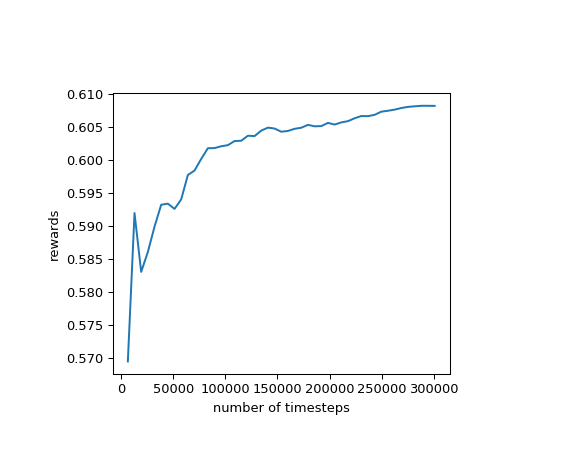

<IPython.core.display.Javascript object>


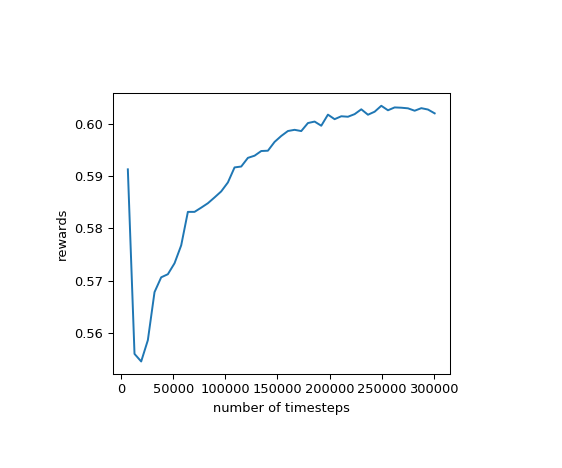

In [9]:
for seed in range(1,4):
    if True:
        print(f'seed {seed}')
        log_dir = './data/'+case+'/seed_'+str(seed)
        os.makedirs(log_dir, exist_ok=True)
        num_cpu = 64
        env_train.seed(seed)
        env_eval.seed(seed)
        env_train_ = env_wrappers(env_train, x_coords, y_coords)
        env_eval_ = env_wrappers(env_eval, x_coords, y_coords)
        train_callback = CustomEvalCallback(env_train_, 
                                            best_model_save_path=None, 
                                            n_eval_episodes=1,
                                            log_path=str(log_dir)+'/results_train', 
                                            eval_freq=100)
        callback_list = [train_callback]
        eval_callback = CustomEvalCallback(env_eval_, 
                                           best_model_save_path=str(log_dir)+'/best_model_eval', 
                                           n_eval_episodes=1,
                                           log_path=str(log_dir)+'/results_eval', 
                                           eval_freq=100)
        callback_list.append(eval_callback)
        callback = CallbackList(callback_list)
        env = SubprocVecEnv([make_env(env_train_, i, seed) for i in range(num_cpu)])
        print(env.observation_space)
        print(f'seed {seed}: model definition ..')
        model = PPO(policy=MlpPolicy,
                env=env,
                learning_rate = 5e-5,
                n_steps = 50,
                batch_size = 16,
                n_epochs = 20,
                gamma = 0.99,
                gae_lambda = 0.95,
                clip_range = 0.1,
                clip_range_vf = None,
                ent_coef = 0.001,
                vf_coef = 0.5,
                max_grad_norm = 0.5,
                use_sde= False,
                create_eval_env= False,
                policy_kwargs = dict(net_arch=[20,20], log_std_init=-1.9),
                verbose = 1,
                target_kl =0.05,
                seed = seed,
                device = "auto")
        print(f'seed {seed}: learning ..')
        model.learn(total_timesteps=300000, callback=callback)
        model.save(log_dir+'/PPO')
        fig = plot_learning(log_dir, case='train')
        fig.savefig(log_dir+'/learn_train.png')
        fig = plot_learning(log_dir, case='eval')
        fig.savefig(log_dir+'/learn_eval.png')